In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"D:\Data_Science\datasets\titanic\train.csv")
df.sample(5)

            

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C


In [6]:
y=df.Survived
X=df[["Pclass","Sex","Age","Fare"]]

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])


C:\Users\HP\AppData\Local\Temp\ipykernel_7564\3337301196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = le.fit_transform(X['Sex'])


In [21]:
X.head()

# X['Age']=X['Age'].fillna(X['Age'].mean())
# X.isnull().sum()
#y.isnull().sum()
#X['Sex'].unique()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [44]:
#cost calculation
def cost_find(y_pred,y_orig):
    m=y_pred.size
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return (1/m * ((-y_orig*np.log(y_pred)) - ((1-y_orig) * np.log(1-y_pred))).sum())
    
#sigmoid
def sigmoid(z):
    return 1/(1+ np.exp(-z))
#partial derivative
def deriv(y_pred,y_orig,var):
    m= y_pred.size
    return 1/m * ((y_pred-y_orig) *var).sum()
#with regularization 
def rederiv(y_pred,y_orig,var,lamda,w):
    m= y_pred.size
    return (1/m * ((y_pred-y_orig) *var).sum()) + lamda/m * w 

def gradient(y_pred,y_orig,var,w,lr):
  return w- (lr*deriv(y_pred,y_orig,var))

In [58]:
#with regularization
def recost_find(y_pred,y_orig,w,lamda):
    m=y_pred.size
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    log_loss=(1/m * ((-y_orig*np.log(y_pred)) - ((1-y_orig) * np.log(1-y_pred))).sum())
    reg_term = (lamda/(2*m)) * np.sum(w**2)
    
    return log_loss + reg_term

def rederiv(y_pred,y_orig,var,lamda,w):
    m= y_pred.size
    return (1/m * ((y_pred-y_orig) *var).sum()) + lamda/m * w 

def regradient(y_pred,y_orig,var,w,lr,lamda):
  return w- (lr*rederiv(y_pred,y_orig,var,lamda,w))

In [52]:
w=np.zeros(X.shape[1])
x=X.to_numpy()
x=np.transpose(x)
b=0
y_pred=0
cost=list()
lr = 0.01
for i in range(0,10000): 
    z=np.dot(w,x)+b
    y_pred=sigmoid(z)
    cost.append(cost_find(y_pred,y))
    for j in range(X.shape[1]):
        w[j]=gradient(y_pred,y,x[j],w[j],lr)
    b=gradient(y_pred,y,1,b,lr)
    if len(cost) > 2 and abs(cost[-1] - cost[-2]) < 0.00001:
        break

In [59]:
#with regularization
w=np.zeros(X.shape[1])
x=X.to_numpy()
x=np.transpose(x)
b=0
y_pred=0
cost=list()
lr = 0.01
lamda=1
for i in range(0,10000): 
    z=np.dot(w,x)+b
    y_pred=sigmoid(z)
    cost.append(recost_find(y_pred,y,w,lamda))
    for j in range(X.shape[1]):
        w[j]=regradient(y_pred,y,x[j],w[j],lr,lamda)
    b=regradient(y_pred,y,1,b,lr,0)
    if len(cost) > 2 and abs(cost[-1] - cost[-2]) < 0.00001:
        break

In [48]:
X_np = X.to_numpy()          # shape (m, n)
y_np = y.to_numpy()          # shape (m,)

m, n = X_np.shape

w = np.zeros(n)
b = 0
lr = 0.01
costs = []

for i in range(10000):
    # Forward pass
    z = np.dot(X_np, w) + b
    y_pred = sigmoid(z)

    # Cost
    cost = cost_find(y_pred, y_np)
    costs.append(cost)

    # Gradients
    dw = (1/m) * np.dot(X_np.T, (y_pred - y_np))
    db = (1/m) * np.sum(y_pred - y_np)

    # Update
    w -= lr * dw
    b -= lr * db

    # Early stopping
    if len(costs) > 2 and abs(costs[-1] - costs[-2]) < 1e-6:
        print(f"Stopped at iteration {i}")
        break


In [ ]:
w=np.zeros(X.shape[1])
x=X.to_numpy()
x=np.transpose(x)
b=0
y_pred=0
cost=list()
lr = 0.01
for i in range(0,10000): 
    z=np.dot(w,x)+b
    y_pred=sigmoid(z)
    cost.append(cost_find(y_pred,y))
    for j in range(X.shape[1]):
        w[j]=gradient(y_pred,y,x[j],w[j],lr)
    b=gradient(y_pred,y,1,b,lr)
    if len(cost) > 2 and abs(cost[-1] - cost[-2]) < 0.00001:
        break

In [49]:
print("weights : ",w)
print("bias  :  ",b)

weights :  [-0.31791925 -3.60013869 -0.02947695  0.00749803]
bias  :   1.324687457040921


In [60]:
print("weights : ",w)
print("bias  :  ",b)

weights :  [-0.32927638 -3.49734006 -0.03021948  0.00825148]
bias  :   1.3114735902143153


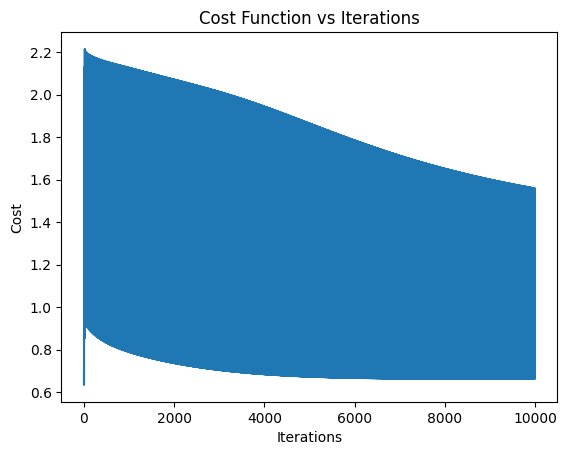

In [61]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.show()


In [37]:
x.shape

(4, 891)